In [1]:
!pip install catboost

     |████████████████████████████████| 10.9 MB 853 kB/s eta 0:00:01
     |████████████████████████████████| 12.9 MB 27 kB/s eta 0:00:011
Processing /Users/makhanov/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c/retrying-1.3.3-cp37-none-any.whl


In [2]:
import catboost
from catboost import datasets

In [3]:
train_df, test_df = datasets.amazon()

In [4]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [5]:
train_df['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [6]:
from catboost import CatBoostClassifier

In [7]:
y = train_df['ACTION']
X = train_df.drop('ACTION', axis=1)

In [8]:
test_df.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [9]:
X_test = test_df.drop('id', axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
cb_model = CatBoostClassifier()
cb_model.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True)

Learning rate set to 0.071005
0:	learn: 0.6099198	test: 0.6097628	best: 0.6097628 (0)	total: 13.9ms	remaining: 13.8s
1:	learn: 0.5412272	test: 0.5408118	best: 0.5408118 (1)	total: 25.6ms	remaining: 12.8s
2:	learn: 0.4834911	test: 0.4830140	best: 0.4830140 (2)	total: 37ms	remaining: 12.3s
3:	learn: 0.4371897	test: 0.4364180	best: 0.4364180 (3)	total: 46.7ms	remaining: 11.6s
4:	learn: 0.3979988	test: 0.3969558	best: 0.3969558 (4)	total: 56.2ms	remaining: 11.2s
5:	learn: 0.3665939	test: 0.3655586	best: 0.3655586 (5)	total: 72.9ms	remaining: 12.1s
6:	learn: 0.3410630	test: 0.3398782	best: 0.3398782 (6)	total: 84.4ms	remaining: 12s
7:	learn: 0.3198427	test: 0.3185015	best: 0.3185015 (7)	total: 94.1ms	remaining: 11.7s
8:	learn: 0.3022968	test: 0.3008810	best: 0.3008810 (8)	total: 104ms	remaining: 11.4s
9:	learn: 0.2878703	test: 0.2864167	best: 0.2864167 (9)	total: 113ms	remaining: 11.2s
10:	learn: 0.2762890	test: 0.2747027	best: 0.2747027 (10)	total: 123ms	remaining: 11s
11:	learn: 0.2656527

106:	learn: 0.1825245	test: 0.1904472	best: 0.1904472 (106)	total: 1.21s	remaining: 10.1s
107:	learn: 0.1823724	test: 0.1903841	best: 0.1903841 (107)	total: 1.23s	remaining: 10.1s
108:	learn: 0.1821242	test: 0.1902078	best: 0.1902078 (108)	total: 1.24s	remaining: 10.1s
109:	learn: 0.1818867	test: 0.1901110	best: 0.1901110 (109)	total: 1.26s	remaining: 10.2s
110:	learn: 0.1815651	test: 0.1898218	best: 0.1898218 (110)	total: 1.28s	remaining: 10.3s
111:	learn: 0.1814107	test: 0.1896901	best: 0.1896901 (111)	total: 1.3s	remaining: 10.3s
112:	learn: 0.1812118	test: 0.1895531	best: 0.1895531 (112)	total: 1.32s	remaining: 10.3s
113:	learn: 0.1809735	test: 0.1894099	best: 0.1894099 (113)	total: 1.33s	remaining: 10.3s
114:	learn: 0.1807299	test: 0.1892633	best: 0.1892633 (114)	total: 1.34s	remaining: 10.3s
115:	learn: 0.1806464	test: 0.1892483	best: 0.1892483 (115)	total: 1.35s	remaining: 10.3s
116:	learn: 0.1804473	test: 0.1890869	best: 0.1890869 (116)	total: 1.36s	remaining: 10.3s
117:	learn:

208:	learn: 0.1638272	test: 0.1797788	best: 0.1797788 (208)	total: 2.44s	remaining: 9.25s
209:	learn: 0.1636425	test: 0.1797021	best: 0.1797021 (209)	total: 2.45s	remaining: 9.23s
210:	learn: 0.1634904	test: 0.1796022	best: 0.1796022 (210)	total: 2.47s	remaining: 9.23s
211:	learn: 0.1632337	test: 0.1794323	best: 0.1794323 (211)	total: 2.48s	remaining: 9.22s
212:	learn: 0.1630796	test: 0.1794022	best: 0.1794022 (212)	total: 2.49s	remaining: 9.22s
213:	learn: 0.1629874	test: 0.1793762	best: 0.1793762 (213)	total: 2.51s	remaining: 9.22s
214:	learn: 0.1627971	test: 0.1792376	best: 0.1792376 (214)	total: 2.52s	remaining: 9.21s
215:	learn: 0.1626012	test: 0.1791265	best: 0.1791265 (215)	total: 2.53s	remaining: 9.2s
216:	learn: 0.1624551	test: 0.1790730	best: 0.1790730 (216)	total: 2.55s	remaining: 9.19s
217:	learn: 0.1623047	test: 0.1790098	best: 0.1790098 (217)	total: 2.56s	remaining: 9.18s
218:	learn: 0.1621871	test: 0.1789976	best: 0.1789976 (218)	total: 2.57s	remaining: 9.16s
219:	learn:

313:	learn: 0.1496388	test: 0.1722372	best: 0.1722372 (313)	total: 3.68s	remaining: 8.04s
314:	learn: 0.1495091	test: 0.1721923	best: 0.1721923 (314)	total: 3.69s	remaining: 8.03s
315:	learn: 0.1493981	test: 0.1721969	best: 0.1721923 (314)	total: 3.71s	remaining: 8.03s
316:	learn: 0.1492864	test: 0.1720841	best: 0.1720841 (316)	total: 3.73s	remaining: 8.03s
317:	learn: 0.1490653	test: 0.1718980	best: 0.1718980 (317)	total: 3.74s	remaining: 8.03s
318:	learn: 0.1489104	test: 0.1718116	best: 0.1718116 (318)	total: 3.76s	remaining: 8.02s
319:	learn: 0.1487305	test: 0.1717200	best: 0.1717200 (319)	total: 3.77s	remaining: 8.02s
320:	learn: 0.1486538	test: 0.1717008	best: 0.1717008 (320)	total: 3.79s	remaining: 8.02s
321:	learn: 0.1485844	test: 0.1716639	best: 0.1716639 (321)	total: 3.8s	remaining: 8s
322:	learn: 0.1484762	test: 0.1716556	best: 0.1716556 (322)	total: 3.81s	remaining: 7.99s
323:	learn: 0.1483457	test: 0.1716030	best: 0.1716030 (323)	total: 3.82s	remaining: 7.97s
324:	learn: 0.

415:	learn: 0.1389795	test: 0.1679576	best: 0.1679576 (415)	total: 4.91s	remaining: 6.89s
416:	learn: 0.1389218	test: 0.1679433	best: 0.1679433 (416)	total: 4.92s	remaining: 6.88s
417:	learn: 0.1387756	test: 0.1679065	best: 0.1679065 (417)	total: 4.93s	remaining: 6.87s
418:	learn: 0.1386602	test: 0.1678845	best: 0.1678845 (418)	total: 4.94s	remaining: 6.86s
419:	learn: 0.1385763	test: 0.1678243	best: 0.1678243 (419)	total: 4.96s	remaining: 6.84s
420:	learn: 0.1385217	test: 0.1678346	best: 0.1678243 (419)	total: 4.97s	remaining: 6.83s
421:	learn: 0.1384912	test: 0.1678141	best: 0.1678141 (421)	total: 4.98s	remaining: 6.82s
422:	learn: 0.1383969	test: 0.1678206	best: 0.1678141 (421)	total: 4.99s	remaining: 6.81s
423:	learn: 0.1382973	test: 0.1677998	best: 0.1677998 (423)	total: 5s	remaining: 6.79s
424:	learn: 0.1382414	test: 0.1677585	best: 0.1677585 (424)	total: 5.01s	remaining: 6.78s
425:	learn: 0.1381204	test: 0.1676763	best: 0.1676763 (425)	total: 5.02s	remaining: 6.77s
426:	learn: 0

516:	learn: 0.1308406	test: 0.1658688	best: 0.1658688 (516)	total: 6.14s	remaining: 5.73s
517:	learn: 0.1308216	test: 0.1658617	best: 0.1658617 (517)	total: 6.15s	remaining: 5.72s
518:	learn: 0.1307350	test: 0.1658525	best: 0.1658525 (518)	total: 6.16s	remaining: 5.71s
519:	learn: 0.1306737	test: 0.1658731	best: 0.1658525 (518)	total: 6.17s	remaining: 5.7s
520:	learn: 0.1306376	test: 0.1658484	best: 0.1658484 (520)	total: 6.18s	remaining: 5.69s
521:	learn: 0.1305912	test: 0.1658492	best: 0.1658484 (520)	total: 6.2s	remaining: 5.67s
522:	learn: 0.1305240	test: 0.1658383	best: 0.1658383 (522)	total: 6.21s	remaining: 5.66s
523:	learn: 0.1304628	test: 0.1657988	best: 0.1657988 (523)	total: 6.22s	remaining: 5.65s
524:	learn: 0.1303976	test: 0.1658409	best: 0.1657988 (523)	total: 6.24s	remaining: 5.64s
525:	learn: 0.1303471	test: 0.1657999	best: 0.1657988 (523)	total: 6.25s	remaining: 5.63s
526:	learn: 0.1303096	test: 0.1657720	best: 0.1657720 (526)	total: 6.26s	remaining: 5.62s
527:	learn: 

617:	learn: 0.1235872	test: 0.1637182	best: 0.1636954 (615)	total: 7.37s	remaining: 4.55s
618:	learn: 0.1235452	test: 0.1636797	best: 0.1636797 (618)	total: 7.38s	remaining: 4.54s
619:	learn: 0.1235120	test: 0.1636831	best: 0.1636797 (618)	total: 7.39s	remaining: 4.53s
620:	learn: 0.1235025	test: 0.1636902	best: 0.1636797 (618)	total: 7.41s	remaining: 4.52s
621:	learn: 0.1234388	test: 0.1637047	best: 0.1636797 (618)	total: 7.42s	remaining: 4.51s
622:	learn: 0.1233772	test: 0.1636838	best: 0.1636797 (618)	total: 7.43s	remaining: 4.49s
623:	learn: 0.1233122	test: 0.1636099	best: 0.1636099 (623)	total: 7.44s	remaining: 4.48s
624:	learn: 0.1232232	test: 0.1635979	best: 0.1635979 (624)	total: 7.45s	remaining: 4.47s
625:	learn: 0.1231518	test: 0.1635483	best: 0.1635483 (625)	total: 7.46s	remaining: 4.46s
626:	learn: 0.1230895	test: 0.1635640	best: 0.1635483 (625)	total: 7.47s	remaining: 4.45s
627:	learn: 0.1230216	test: 0.1635197	best: 0.1635197 (627)	total: 7.49s	remaining: 4.43s
628:	learn

711:	learn: 0.1177790	test: 0.1616894	best: 0.1616894 (711)	total: 8.61s	remaining: 3.48s
712:	learn: 0.1176720	test: 0.1616424	best: 0.1616424 (712)	total: 8.62s	remaining: 3.47s
713:	learn: 0.1175923	test: 0.1616270	best: 0.1616270 (713)	total: 8.64s	remaining: 3.46s
714:	learn: 0.1175280	test: 0.1616120	best: 0.1616120 (714)	total: 8.65s	remaining: 3.45s
715:	learn: 0.1174932	test: 0.1615869	best: 0.1615869 (715)	total: 8.66s	remaining: 3.44s
716:	learn: 0.1173789	test: 0.1615417	best: 0.1615417 (716)	total: 8.68s	remaining: 3.42s
717:	learn: 0.1173604	test: 0.1615448	best: 0.1615417 (716)	total: 8.69s	remaining: 3.41s
718:	learn: 0.1173076	test: 0.1615311	best: 0.1615311 (718)	total: 8.7s	remaining: 3.4s
719:	learn: 0.1172665	test: 0.1615671	best: 0.1615311 (718)	total: 8.71s	remaining: 3.39s
720:	learn: 0.1172043	test: 0.1615935	best: 0.1615311 (718)	total: 8.73s	remaining: 3.38s
721:	learn: 0.1171073	test: 0.1616018	best: 0.1615311 (718)	total: 8.74s	remaining: 3.37s
722:	learn: 

806:	learn: 0.1122550	test: 0.1603730	best: 0.1603008 (803)	total: 9.84s	remaining: 2.35s
807:	learn: 0.1121879	test: 0.1603328	best: 0.1603008 (803)	total: 9.85s	remaining: 2.34s
808:	learn: 0.1120907	test: 0.1603288	best: 0.1603008 (803)	total: 9.87s	remaining: 2.33s
809:	learn: 0.1120414	test: 0.1603225	best: 0.1603008 (803)	total: 9.88s	remaining: 2.32s
810:	learn: 0.1119736	test: 0.1602861	best: 0.1602861 (810)	total: 9.89s	remaining: 2.3s
811:	learn: 0.1119279	test: 0.1602652	best: 0.1602652 (811)	total: 9.9s	remaining: 2.29s
812:	learn: 0.1118609	test: 0.1602263	best: 0.1602263 (812)	total: 9.92s	remaining: 2.28s
813:	learn: 0.1117986	test: 0.1601845	best: 0.1601845 (813)	total: 9.93s	remaining: 2.27s
814:	learn: 0.1117245	test: 0.1601829	best: 0.1601829 (814)	total: 9.94s	remaining: 2.26s
815:	learn: 0.1116575	test: 0.1601577	best: 0.1601577 (815)	total: 9.96s	remaining: 2.25s
816:	learn: 0.1115899	test: 0.1601557	best: 0.1601557 (816)	total: 9.97s	remaining: 2.23s
817:	learn: 

901:	learn: 0.1072927	test: 0.1597473	best: 0.1597260 (887)	total: 11.1s	remaining: 1.2s
902:	learn: 0.1072396	test: 0.1598126	best: 0.1597260 (887)	total: 11.1s	remaining: 1.19s
903:	learn: 0.1071636	test: 0.1598339	best: 0.1597260 (887)	total: 11.1s	remaining: 1.18s
904:	learn: 0.1071136	test: 0.1597978	best: 0.1597260 (887)	total: 11.1s	remaining: 1.16s
905:	learn: 0.1070014	test: 0.1597723	best: 0.1597260 (887)	total: 11.1s	remaining: 1.15s
906:	learn: 0.1069317	test: 0.1597804	best: 0.1597260 (887)	total: 11.1s	remaining: 1.14s
907:	learn: 0.1069008	test: 0.1598166	best: 0.1597260 (887)	total: 11.1s	remaining: 1.13s
908:	learn: 0.1068227	test: 0.1597439	best: 0.1597260 (887)	total: 11.1s	remaining: 1.11s
909:	learn: 0.1067550	test: 0.1596935	best: 0.1596935 (909)	total: 11.2s	remaining: 1.1s
910:	learn: 0.1066937	test: 0.1597151	best: 0.1596935 (909)	total: 11.2s	remaining: 1.09s
911:	learn: 0.1066494	test: 0.1597314	best: 0.1596935 (909)	total: 11.2s	remaining: 1.08s
912:	learn: 

In [14]:
cb_preds = cb_model.predict(X_valid)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, cb_preds))

              precision    recall  f1-score   support

           0       0.70      0.22      0.33       369
           1       0.96      0.99      0.97      6185

    accuracy                           0.95      6554
   macro avg       0.83      0.61      0.65      6554
weighted avg       0.94      0.95      0.94      6554



In [16]:
cb_model_gpu = CatBoostClassifier(task_type='GPU')

In [17]:
cb_model_gpu.fit(X_train, y_train)

CatBoostError: catboost/libs/train_lib/train_model.cpp:916: Can't load GPU learning library. Module was not compiled or driver  is incompatible with package. Please install latest NVDIA driver and check again

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('/Users/makhanov/Dropbox/Yessenov Data Lab/Week 3/Day 5/heart.csv')

In [109]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
X = df.drop('target', axis=1)
y = df['target']

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

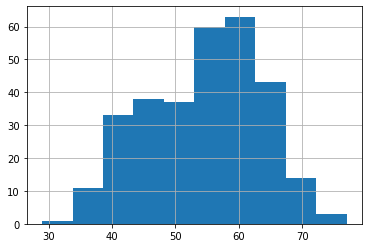

In [108]:
df['age'].hist()

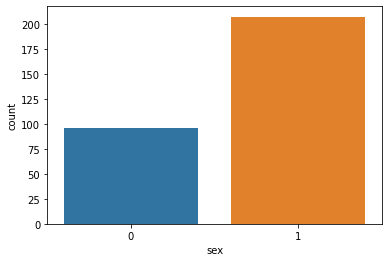

In [111]:
sns.countplot(df['sex'])

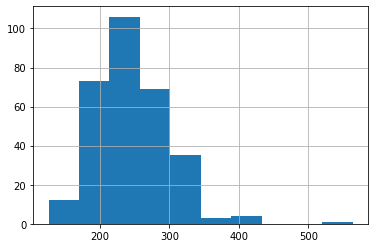

In [112]:
df['chol'].hist()

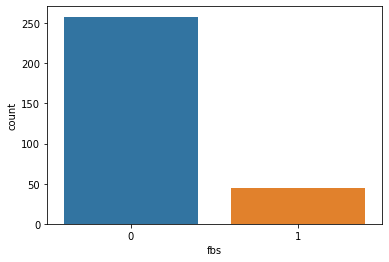

In [113]:
sns.countplot(df['fbs'])

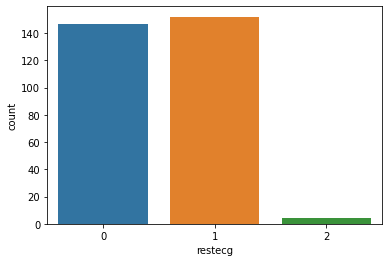

In [114]:
sns.countplot(df['restecg'])

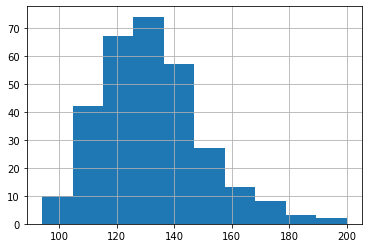

In [115]:
df['trestbps'].hist()

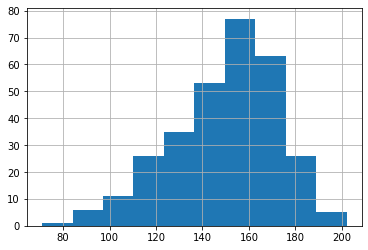

In [116]:
df['thalach'].hist()

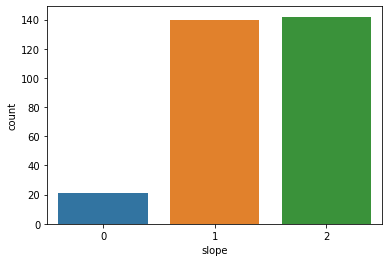

In [117]:
sns.countplot(df['slope'])

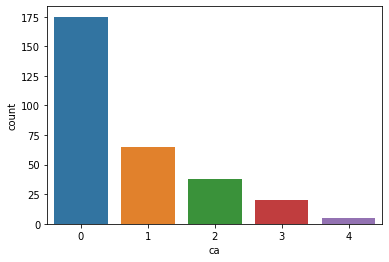

In [118]:
sns.countplot(df['ca'])

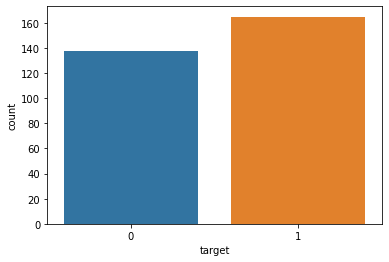

In [119]:
sns.countplot(df['target'])

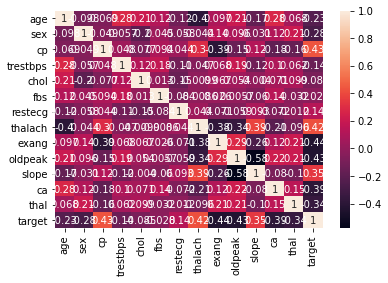

In [126]:
sns.heatmap(df.corr(), annot=True)

In [121]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [28]:
import lightgbm as lgb
import xgboost as xgb

In [27]:
!pip install lightgbm

     |████████████████████████████████| 679 kB 223 kB/s eta 0:00:01


In [42]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)
lgb_pred = model_lgb.predict(X_test)

model_lgb_nik = lgb.LGBMClassifier(max_depth=50,  n_estimators=57,num_leaves=10)
model_lgb_nik.fit(X_train, y_train)
lgb_pred1 = model_lgb_nik.predict(X_test)

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
xgb_pred = model_xgb.predict(X_test)

In [43]:
print('LGB:', classification_report(y_test, lgb_pred))
print('LGB1:', classification_report(y_test, lgb_pred1))
print('XGB:', classification_report(y_test, xgb_pred))

LGB:               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

LGB1:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

XGB:               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [39]:
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

cb_grid = GridSearchCV(model, params, cv=5)
cb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.02, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=600, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [40]:
xgb_pred1 = cb_grid.predict(X_test)
print('XGB:', classification_report(y_test, xgb_pred1))

XGB:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [46]:
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=600, objective='binary:logistic')

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

cb_grid = GridSearchCV(model, params, cv=)
cb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=600, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [47]:
xgb_pred2 = cb_grid.predict(X_test)
print('XGB:', classification_report(y_test, xgb_pred2))

XGB:               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [52]:
cb_grid.best_params_

{'colsample_bytree': 0.6,
 'gamma': 1.5,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 1.0}

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X,y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [53]:
model1 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=600, 
                          objective='binary:logistic', 
                          colsample_bytree= 0.6,
                         gamma=1.5,
                         max_depth=3,
                         min_child_weight= 10,
                         subsample= 1.0)
model1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
preds = model1.predict(X_test)
print('XGB/wScaler:', classification_report(y_test, preds))

XGB/wScaler:               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [56]:
model1 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=600, 
                          objective='binary:logistic', 
                          colsample_bytree= 0.6,
                         gamma=1.5,
                         max_depth=3,
                         min_child_weight= 10,
                         subsample= 1.0,
                          cv=5)
model1.fit(X_train, y_train)

[14:47:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { cv } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, cv=5, gamma=1.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
print('RandomForest/wScaler:', classification_report(y_test, rf_preds))

dt_preds = dt_model.predict(X_test)
print('DecisionTree/wScaler:', classification_report(y_test, dt_preds))

RandomForest/wScaler:               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

DecisionTree/wScaler:               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [74]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek()
X_smote, y_smote = smotetomek.fit_sample(X_scaled, y)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)
model3 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=600, 
                          objective='binary:logistic', 
                          colsample_bytree= 0.6,
                         gamma=1.5,
                         max_depth=3,
                         min_child_weight= 10,
                         subsample= 1.0)
model3.fit(X_train, y_train)
preds_smote = model1.predict(X_test)
print('XGB/wScaler/wSMOTE:', classification_report(y_test, preds_smote))

XGB/wScaler/wSMOTE:               precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.94      0.97      0.95        30

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)
model3 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=600, 
                          objective='binary:logistic', 
                          colsample_bytree= 0.6,
                         gamma=1.5,
                         max_depth=3,
                         min_child_weight= 10,
                         subsample= 1.0)
model3.fit(X_train, y_train)
preds_smote = model3.predict(X_test)
print('XGB/wScaler/wSMOTE:', classification_report(y_test, preds_smote))

XGB/wScaler/wSMOTE:               precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.85      0.94      0.89        31

    accuracy                           0.89        62
   macro avg       0.89      0.89      0.89        62
weighted avg       0.89      0.89      0.89        62



In [76]:
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
print('RandomForest/wScaler:', classification_report(y_test, rf_preds))

dt_preds = dt_model.predict(X_test)
print('DecisionTree/wScaler:', classification_report(y_test, dt_preds))

RandomForest/wScaler:               precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.85      0.94      0.89        31

    accuracy                           0.89        62
   macro avg       0.89      0.89      0.89        62
weighted avg       0.89      0.89      0.89        62

DecisionTree/wScaler:               precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.90      0.87      0.89        31

    accuracy                           0.89        62
   macro avg       0.89      0.89      0.89        62
weighted avg       0.89      0.89      0.89        62



In [77]:
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=600, objective='binary:logistic')

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

cb_grid = GridSearchCV(model, params, cv=3)
cb_grid.fit(X_train, y_train)
xgb_pred2 = cb_grid.predict(X_test)
print('XGB:', classification_report(y_test, xgb_pred2))

XGB:               precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.86      0.97      0.91        31

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



In [78]:
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=600, objective='binary:logistic')

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

cb_grid = GridSearchCV(model, params)
cb_grid.fit(X_train, y_train)
xgb_pred2 = cb_grid.predict(X_test)
print('XGB:', classification_report(y_test, xgb_pred2))

XGB:               precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.86      0.97      0.91        31

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



In [79]:
model = xgb.XGBClassifier(n_estimators=600, objective='binary:logistic')

params = {
        'learning_rate': [0.01, 0.02, 0.1],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

cb_grid = GridSearchCV(model, params)
cb_grid.fit(X_train, y_train)
xgb_pred2 = cb_grid.predict(X_test)
print('XGB:', classification_report(y_test, xgb_pred2))

XGB:               precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.86      0.97      0.91        31

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



In [80]:
cb_grid.best_params_

{'colsample_bytree': 1.0,
 'gamma': 1.5,
 'learning_rate': 0.02,
 'max_depth': 3,
 'min_child_weight': 5,
 'subsample': 0.6}

In [84]:
len(X_train)

248

In [85]:
248+62

310

In [86]:
len(X)

303

In [90]:
from catboost import CatBoostClassifier, Pool

In [99]:
train_data = Pool(data=X_train,
                  label=y_train,
                  #weight=[0.1, 0.2, 0.3]
                 )
test_data = Pool(data=X_test,
                  label=y_test,
                  #weight=[0.1, 0.2, 0.3]
                 )

In [100]:
model = CatBoostClassifier(iterations=10)

model.fit(train_data)
preds_class = model.predict(test_data)

Learning rate set to 0.387583
0:	learn: 0.6035964	total: 1.56ms	remaining: 14.1ms
1:	learn: 0.5312347	total: 3.22ms	remaining: 12.9ms
2:	learn: 0.4826040	total: 4.82ms	remaining: 11.2ms
3:	learn: 0.4482893	total: 6.08ms	remaining: 9.13ms
4:	learn: 0.4039474	total: 8ms	remaining: 8ms
5:	learn: 0.3762806	total: 9.69ms	remaining: 6.46ms
6:	learn: 0.3480677	total: 11.1ms	remaining: 4.74ms
7:	learn: 0.3195700	total: 12.5ms	remaining: 3.12ms
8:	learn: 0.3004898	total: 14ms	remaining: 1.55ms
9:	learn: 0.2815910	total: 15ms	remaining: 0us


In [101]:
print('Pool:', classification_report(y_test, preds_class))

Pool:               precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.86      0.97      0.91        31

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



In [105]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek()
X_smote, y_smote = smotetomek.fit_sample(X, y)

In [125]:
X_scaled = scaler.fit_transform(X_smote)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)

In [132]:
model = xgb.XGBClassifier(n_jobs = -1, max_depth = 10, min_child_weight = 3, max_delta_step = 4)

# params = {
#         'learning_rate': [0.01, 0.02, 0.1],
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

# cb_grid = GridSearchCV(model, params)
model.fit(X_train, y_train)
xgb_pred2 = model.predict(X_test)
print('XGB:', classification_report(y_test, xgb_pred2))

XGB:               precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.88      0.75      0.81        28

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.83      0.82      0.82        55

